# Rekha Meena


# @The Sparks Foundation


# Data Science & Business Analytics Intern





## Task-2 : Prediction using Unsupervised ML

### Problem Statement :  
From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.


Dataset : https://bit.ly/3kXTdox





In [18]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Importing libraries in Python



In [19]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Load Dataset

In [20]:
import sklearn.datasets as datasets

# Loading the iris dataset

iris=datasets.load_iris()

# Import Dataset 

In [144]:
df = pd.read_csv("Iris.csv")
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


# Data Preprocessing

In [5]:
df.shape

(150, 6)

In [34]:
df.size

900

In [11]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [143]:
df.describe

<bound method NDFrame.describe of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  cluster  cen_x  cen_y    c  
0       Iris-setosa       11    NaN    NaN  NaN  
1       Iris-setosa      

In [17]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

# check the null value

In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df.cov()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1887.500000,25.782886,-7.492282,67.667785,29.832215
SepalLengthCm,25.782886,0.685694,-0.039268,1.273682,0.516904
SepalWidthCm,-7.492282,-0.039268,0.188004,-0.321713,-0.117981
PetalLengthCm,67.667785,1.273682,-0.321713,3.113179,1.296387
PetalWidthCm,29.832215,0.516904,-0.117981,1.296387,0.582414


# Explotary Data Analysis

# Univariate Analysis

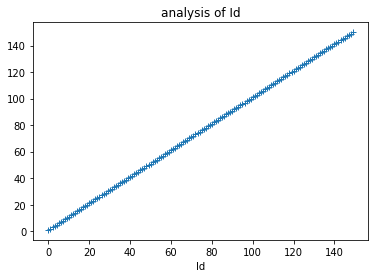

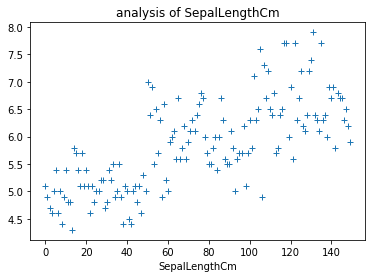

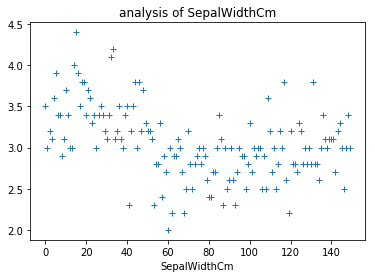

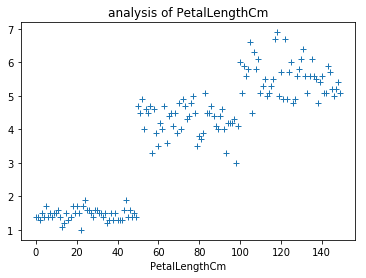

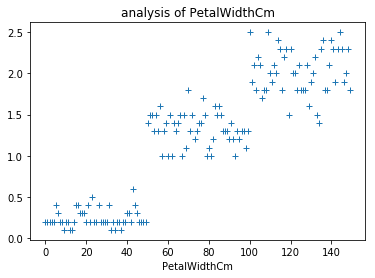

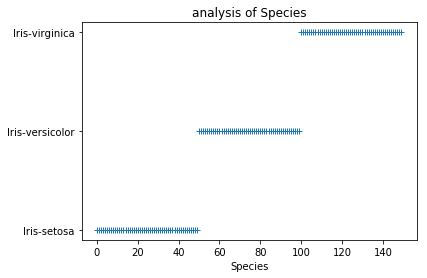

In [22]:
features = df.columns

for feature in features:
    plt.plot(df[feature],'+')
    plt.xlabel(feature)
    plt.title('analysis of ' + feature)
    plt.show()

# Bivariate-Analysis

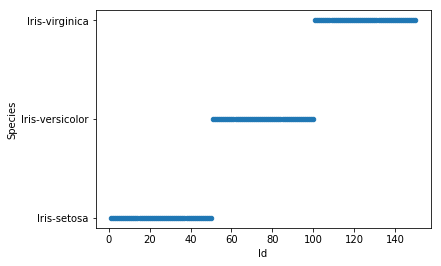

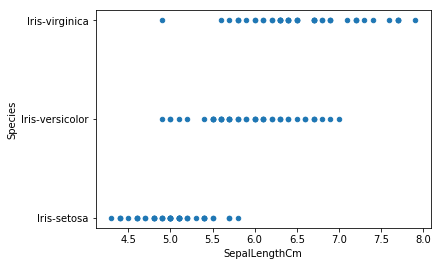

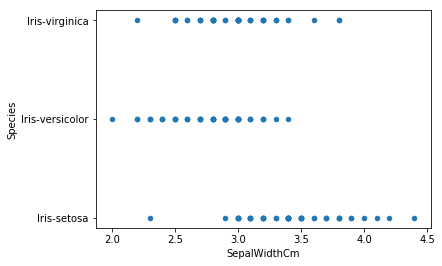

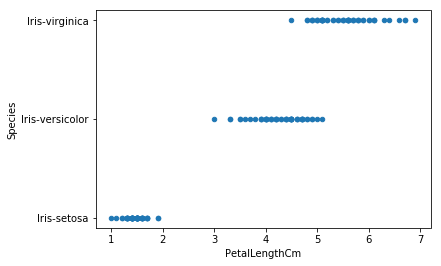

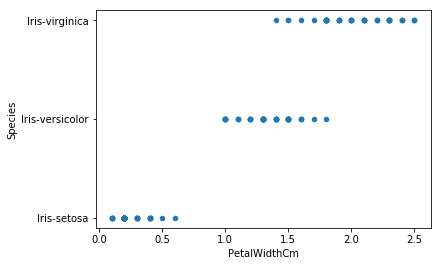

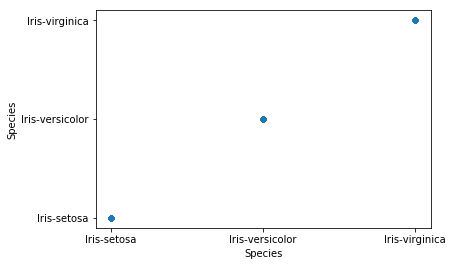

In [23]:
for feature in features:
    df.plot(kind = 'scatter', x = feature, y = 'Species')
    plt.show()

# Find the Correlation

In [10]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


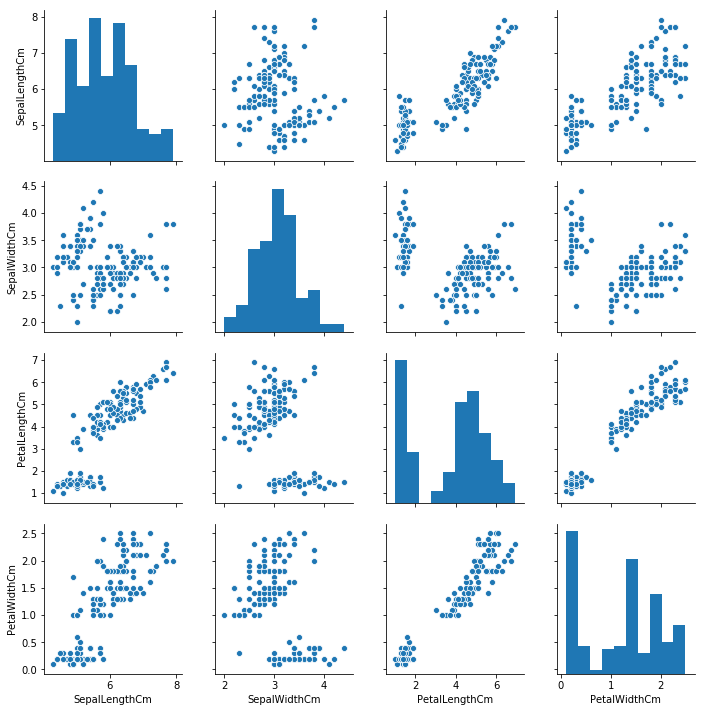

In [36]:
col =[i for i in df.columns if df[str(i)].dtype =='float64']
col.append('Species')
sns.pairplot(df[col])

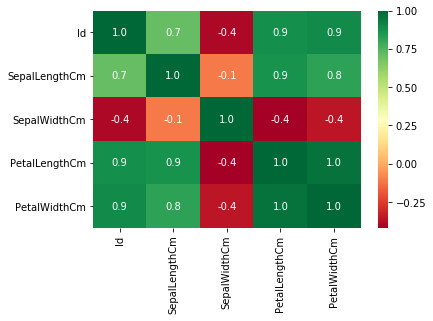

In [37]:
sns.heatmap(df.corr(), annot=True, fmt='.1f', cmap='RdYlGn')

# Plot the Boxplot check the Outlier - 

In [42]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

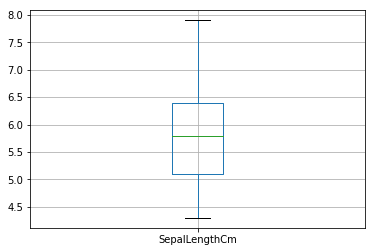

In [44]:
df.boxplot(column= 'SepalLengthCm',grid = True)

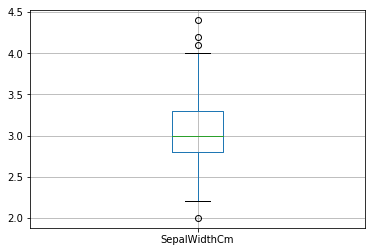

In [45]:
df.boxplot(column= 'SepalWidthCm',grid = True)

## Plot show SepalWidthCm value is having Outlier

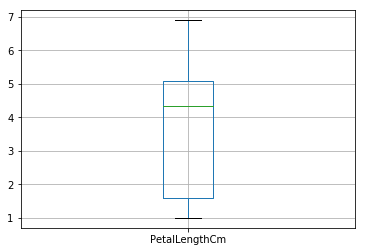

In [46]:
df.boxplot(column= 'PetalLengthCm',grid = True)


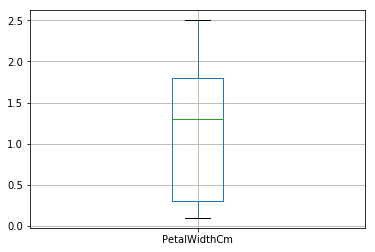

In [47]:
df.boxplot(column= 'PetalWidthCm',grid = True)

# Histogram of Feature Set

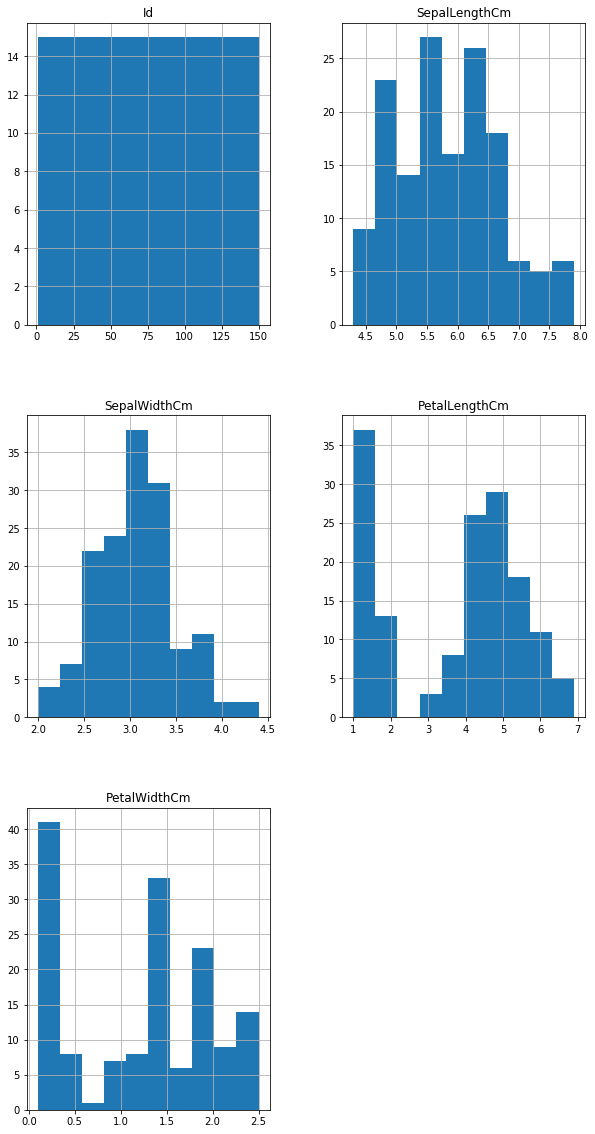

In [50]:
df.hist(bins=10,figsize=(10,20))
plt.show()

In [30]:
df['Species'].nunique()

3

In [53]:
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

# Model Building

## k-means clustering method 

- The k-means clustering method is an unsupervised machine learning technique used to identify clusters of data objects in a dataset.
- Here the data is divided into several groups (clusters), data points in each group have similar characteristics.

In [137]:
# Here, we will call some basic and important libraries to work.
from sklearn.cluster import KMeans

In [65]:

wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++' ,max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print("Cluster", i, "Inertia", kmeans.inertia_)
    
    
    


Cluster 1 Inertia 281831.54466666665
Cluster 2 Inertia 70581.3808
Cluster 3 Inertia 31320.711199999998
Cluster 4 Inertia 17758.79250355619
Cluster 5 Inertia 11468.96874702381
Cluster 6 Inertia 7921.863473076923
Cluster 7 Inertia 5911.632365518539
Cluster 8 Inertia 4541.979023391813
Cluster 9 Inertia 3571.911095588235
Cluster 10 Inertia 2943.933100840336
Cluster 11 Inertia 2464.081294871795
Cluster 12 Inertia 2039.845238927739
Cluster 13 Inertia 1785.6793065268066
Cluster 14 Inertia 1571.0434581529585
Cluster 15 Inertia 1353.0395353535355
Cluster 16 Inertia 1225.3615126262628
Cluster 17 Inertia 1080.3908308080809
Cluster 18 Inertia 980.2366587301588
Cluster 19 Inertia 875.7900992063492


# Plot All K-Means Clusters

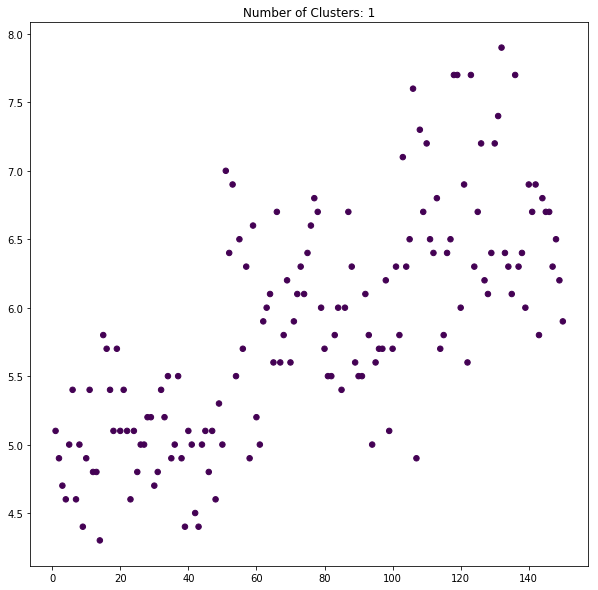

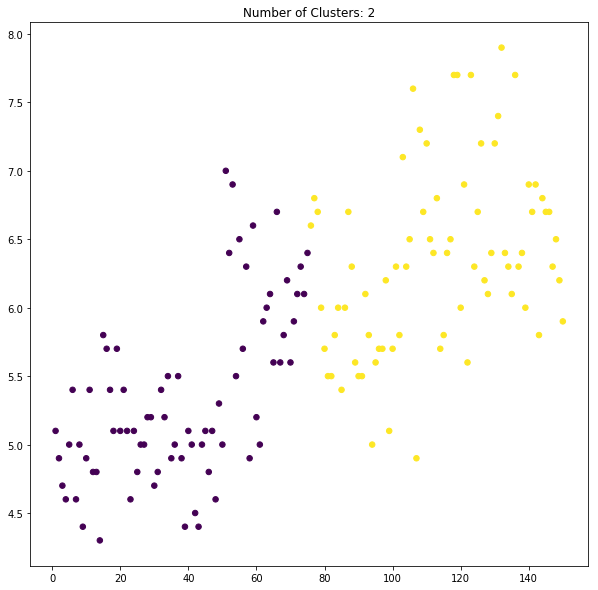

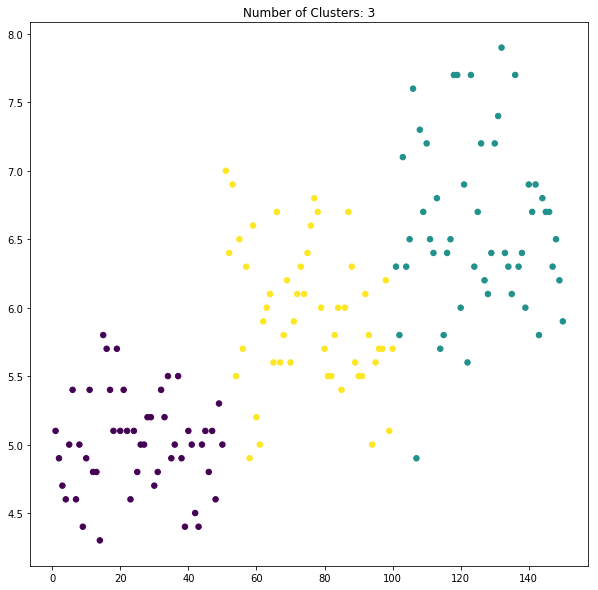

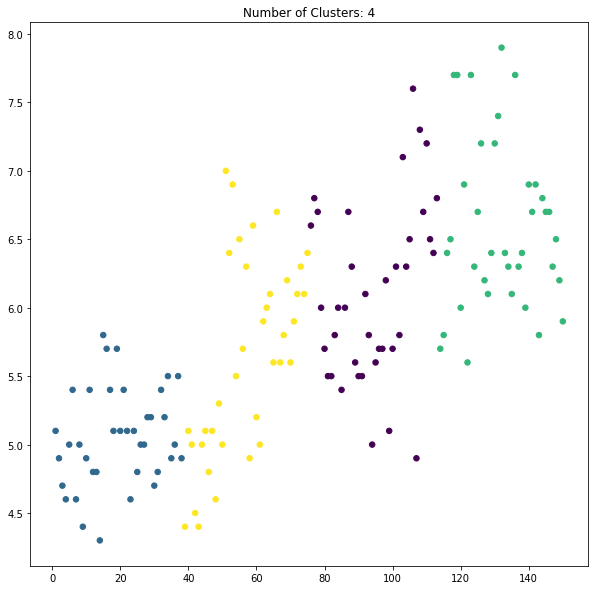

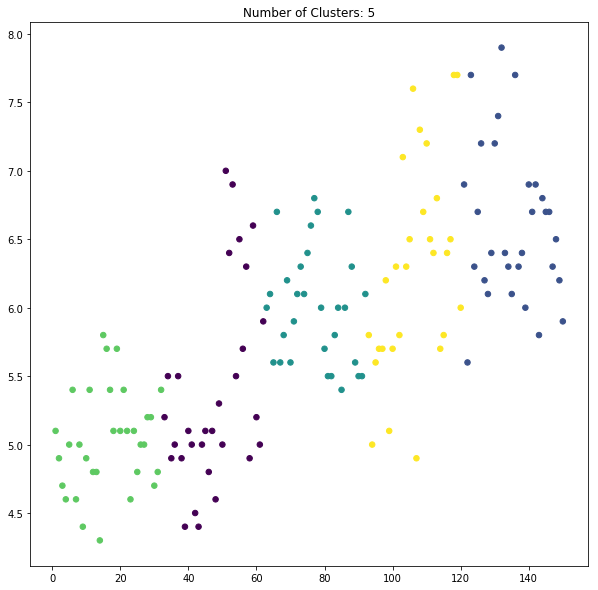

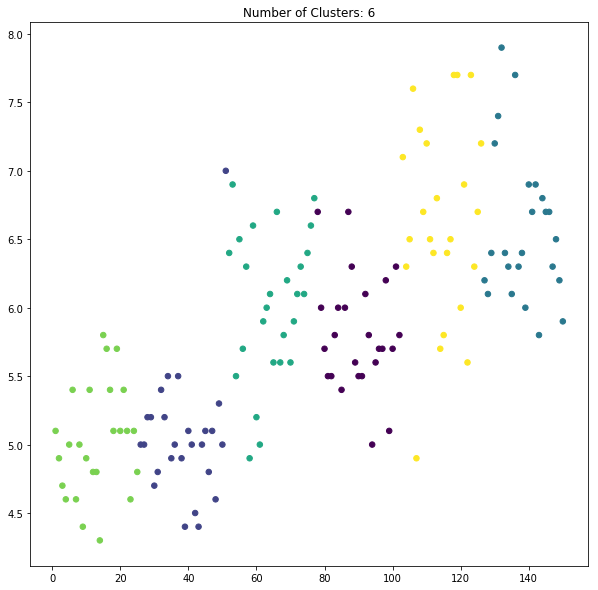

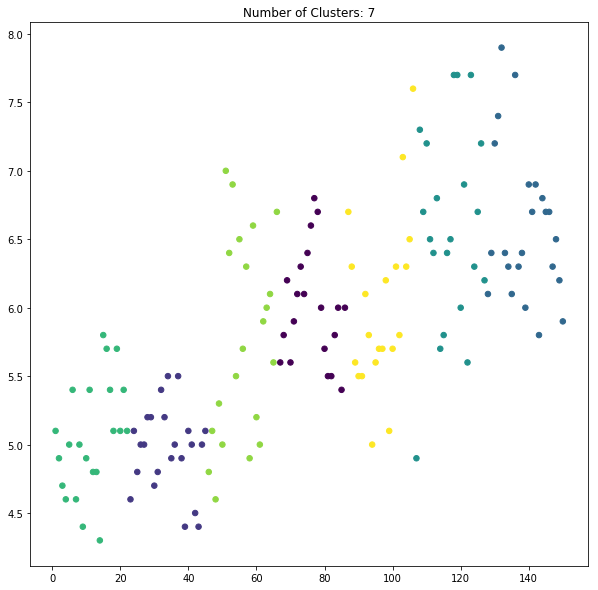

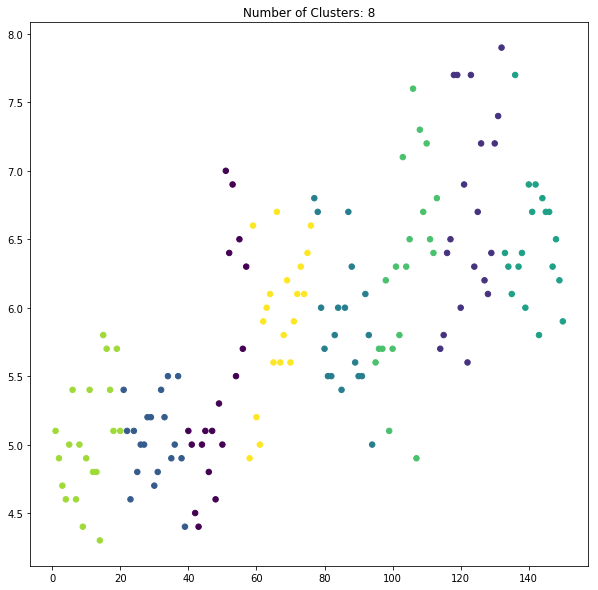

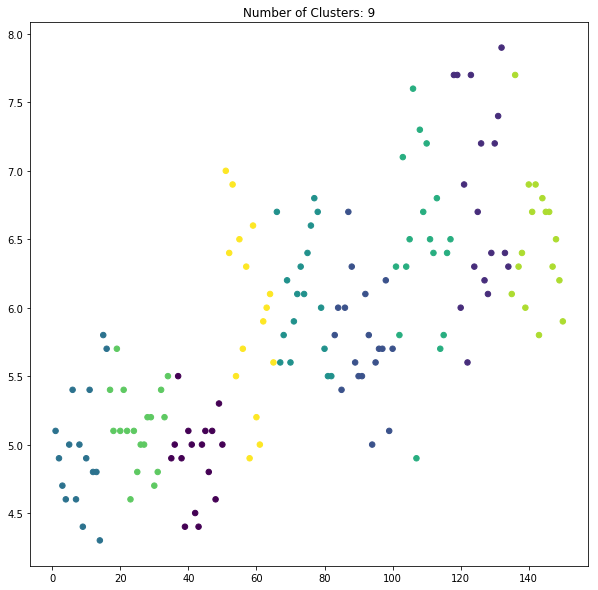

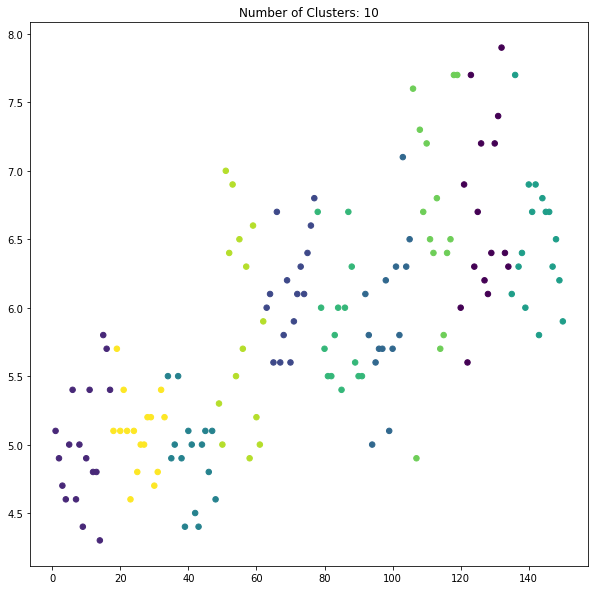

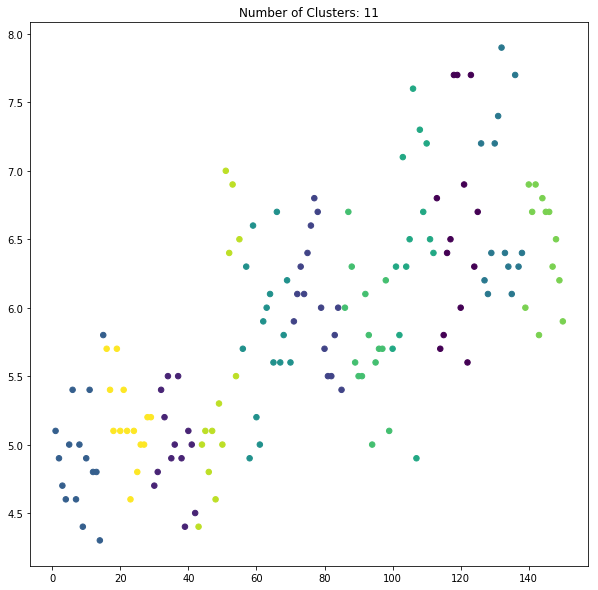

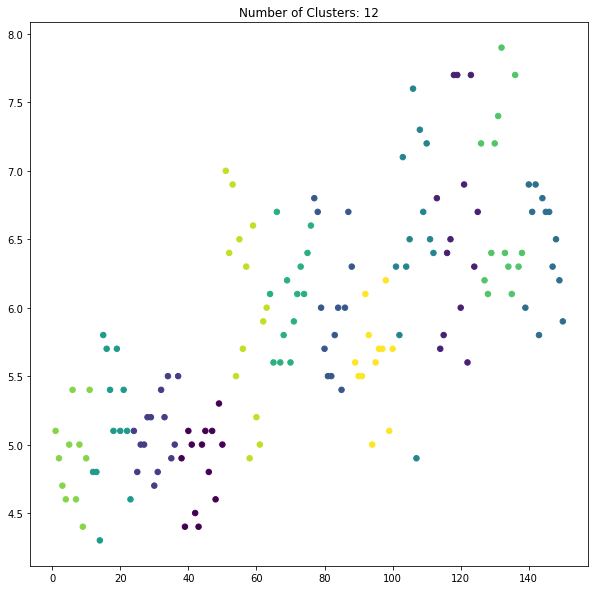

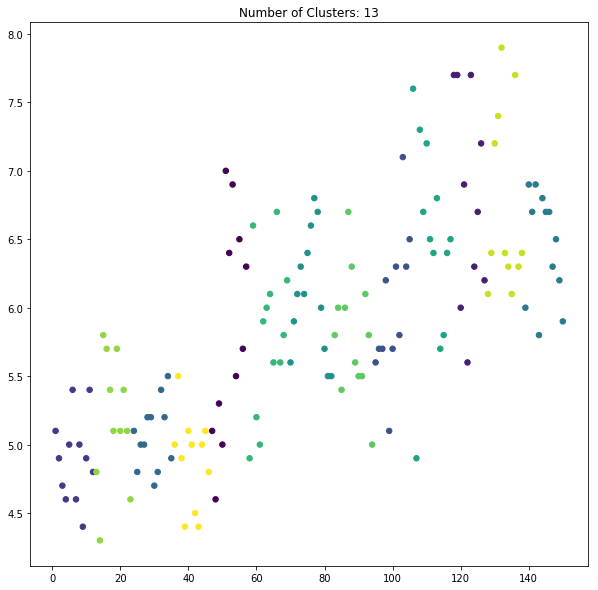

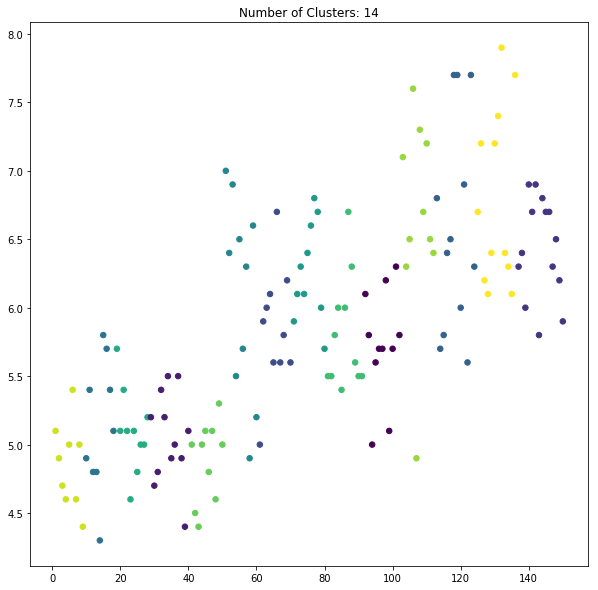

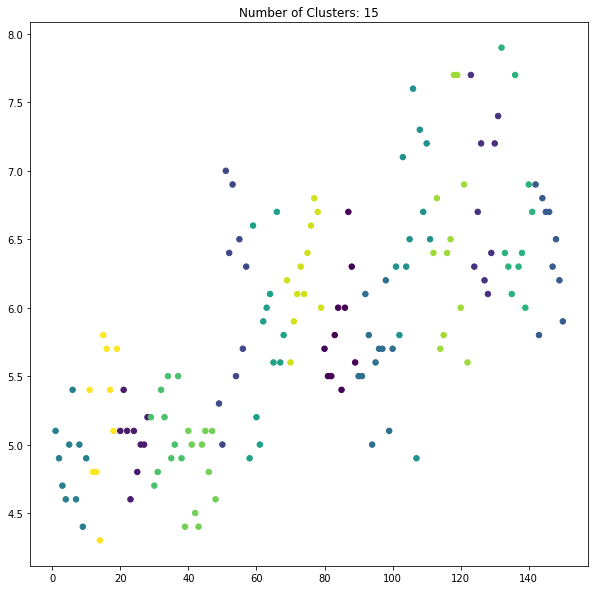

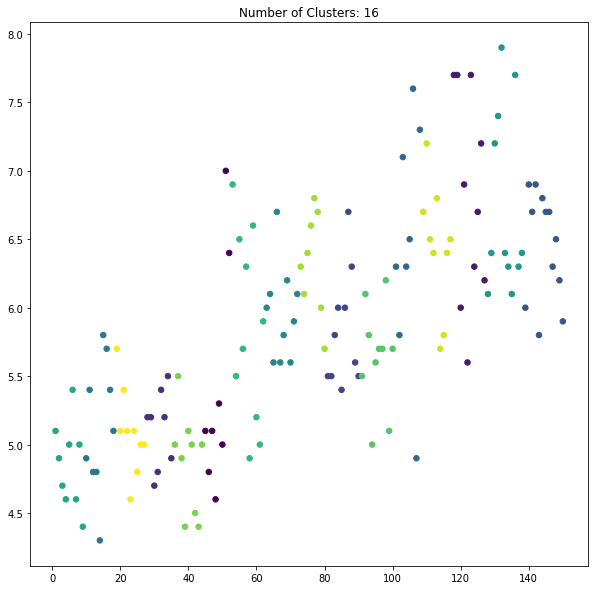

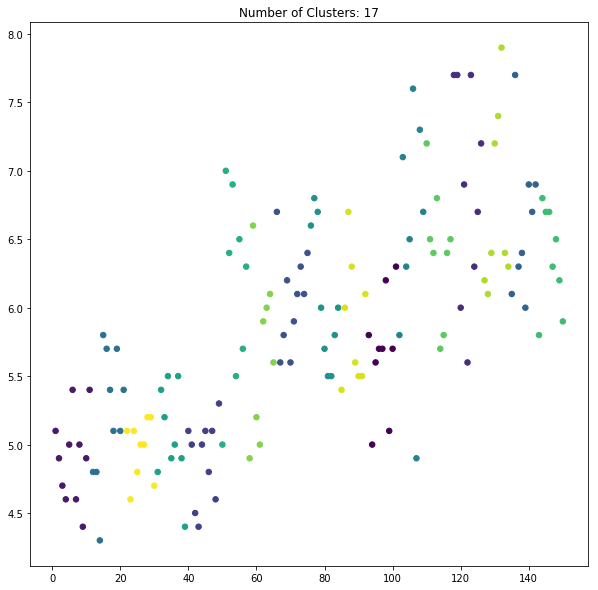

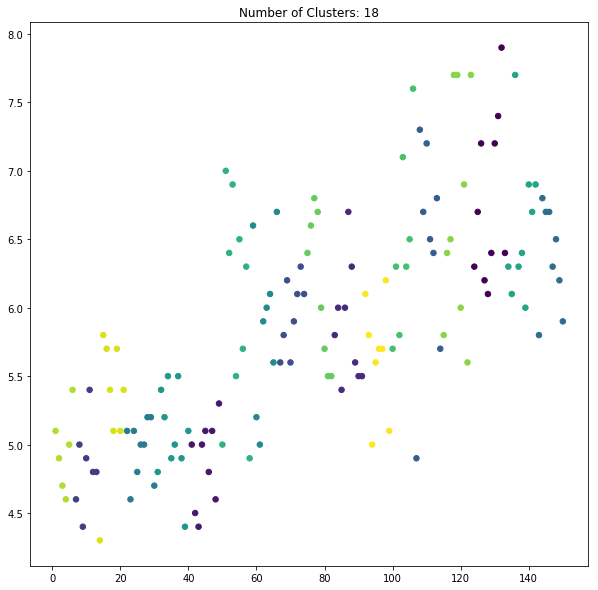

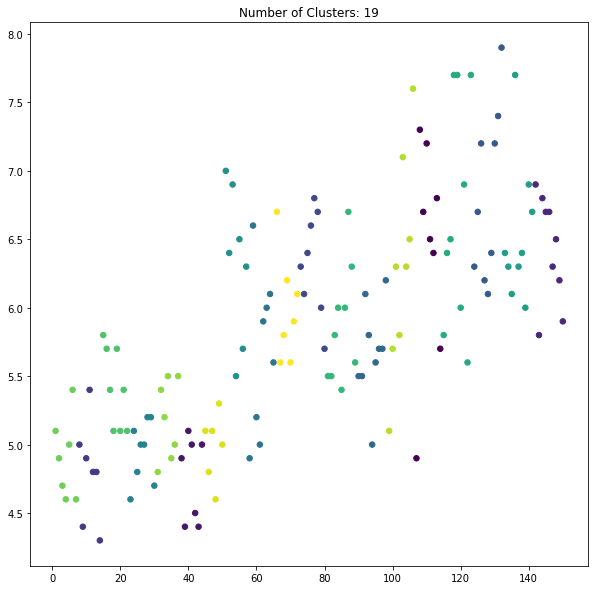

In [136]:
# Plot the data and color code based on clusters
# changing the number of clusters

for i in range(1,20):
    plt.figure(figsize=(10, 10))
    
    
    # Predicting the clusters
    y_pred = KMeans(n_clusters=i, random_state=0).fit_predict(x)
# plotting the clusters
    plt.scatter(x[:, 0], x[:, 1], c=y_pred, s=30)
    plt.title(f"Number of Clusters: {i}")
plt.show();

# plot an elbow curve which can clearly depict a trade-off between the number of centroids and information gain.

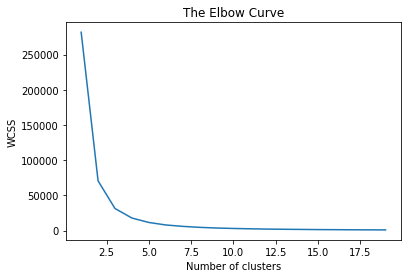

In [67]:
plt.plot(range(1,20),wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') ##WCSS stands for total within-cluster sum of square
plt.show()

This is a graph which will help us to findout number of clusters

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as '3'.

In [79]:
#predict the labels of clusters.
label = kmeans.fit_predict(x)
print(label)

[14 14 14 14 14 14 14  3  3  3  3  3  3  3 13 13 13 13 13 13 13 13  8  8
  8  8  8  8  8  8 15 15 15 15 15 15 15  1  1  1  1  1  1  1 17 17 17 17
 17 17  9  9  9  9  9  9  9  7  7  7  7  7  7  7  7 18 18 18 18 18 18 18
  4  4  4  4  4  4  4  4 12 12 12 12 12 12 12 12 12  6  6  6  6  6  6  6
  6  6 16 16 16 16 16 16 16 16  0  0  0  0  0  0  0  0 11 11 11 11 11 11
 11 11 11  5  5  5  5  5  5  5  5  5 10 10 10 10 10 10 10 10 10  2  2  2
  2  2  2  2  2  2]


In [69]:
# we can see our three centers by using the following command.
kmeans.cluster_centers_

array([[110.5       ,   6.4375    ,   2.8625    ,   5.45      ],
       [ 41.        ,   4.75714286,   3.14285714,   1.4       ],
       [146.        ,   6.42222222,   3.02222222,   5.3       ],
       [ 11.        ,   4.8       ,   3.21428571,   1.42857143],
       [ 76.5       ,   6.325     ,   2.8125    ,   4.5125    ],
       [128.        ,   6.82222222,   3.04444444,   5.57777778],
       [ 94.        ,   5.67777778,   2.72222222,   4.13333333],
       [ 61.5       ,   5.6625    ,   2.625     ,   3.975     ],
       [ 26.5       ,   4.95      ,   3.35      ,   1.5375    ],
       [ 54.        ,   6.32857143,   2.95714286,   4.55714286],
       [137.        ,   6.53333333,   2.98888889,   5.47777778],
       [119.        ,   6.7       ,   2.93333333,   5.75555556],
       [ 85.        ,   5.86666667,   2.77777778,   4.3       ],
       [ 18.5       ,   5.4125    ,   3.8125    ,   1.475     ],
       [  4.        ,   4.9       ,   3.38571429,   1.44285714],
       [ 34.        ,   5

# Now lets test model

In [138]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [139]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

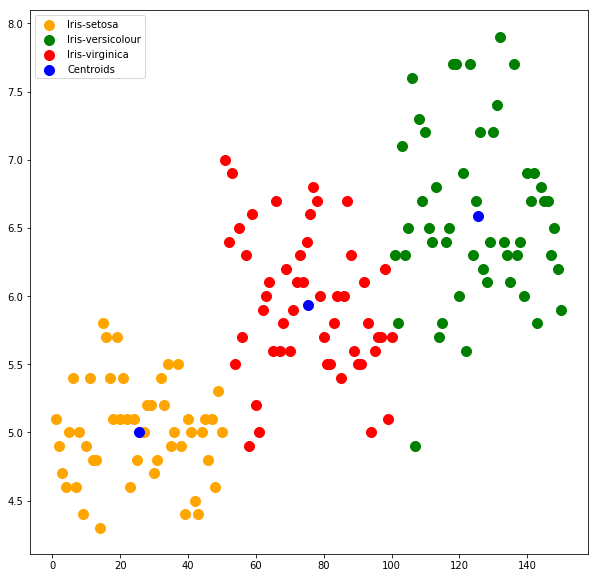

In [142]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(10,10))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'red', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'blue', label = 'Centroids')

plt.legend()

This is a graphic way to represent our distribution .

### We have successfully created three clusters from our Iris data set. All data clusters are shown in different colors.